In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

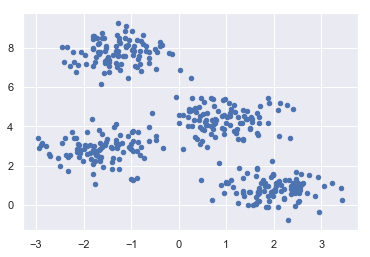

In [3]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [4]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 2, 2, 3, 2, 0, 1, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 2, 2, 2,
       0, 3, 3, 0, 0, 3, 3, 1, 3, 3, 2, 3, 2, 0, 1, 3, 1, 3, 2, 0, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 2,
       1, 3, 2, 0, 2, 3, 2, 0, 1, 2, 3, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 3,
       2, 1, 2, 1, 3, 2, 2, 0, 3, 1, 1, 1, 0, 1, 3, 3, 2, 0, 3, 0, 1, 2,
       2, 2, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 3, 0, 1, 1, 1, 3, 0, 0,
       0, 2, 3, 2, 0, 3, 0, 2, 3, 2, 2, 0, 2, 1, 3, 2, 1, 2, 1, 3, 1, 3,
       0, 2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       3, 2, 3, 0, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3, 3, 0, 2, 0, 0, 0, 1,
       1, 3, 3, 2, 1, 1, 0, 3, 2, 0, 3, 0, 3, 3, 1, 1, 0, 1, 3, 0, 1, 0,
       2, 3, 0, 2, 2, 2, 1, 0, 3, 0, 3, 2, 3, 3, 0, 1, 2, 1, 3, 2, 1, 3,
       3, 0, 1, 3, 0, 3, 1, 2, 2, 1, 2, 3, 0, 0, 3, 3, 1, 0, 3, 2, 2, 2,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 3, 2, 0,

In [49]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

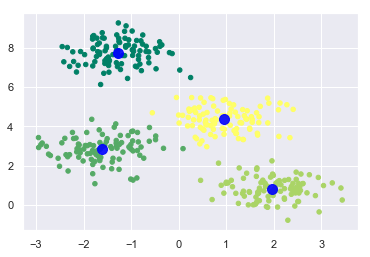

In [50]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

best k 4


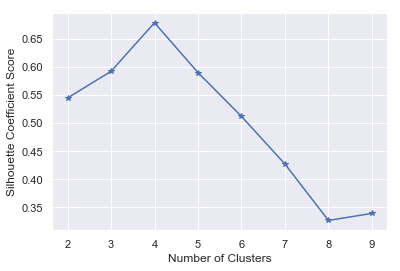

In [29]:
from sklearn.metrics import silhouette_score
import numpy as np
def find_best_k(X):
    sc_scores = []
    score_indexes = []
    clusters = range(2,10)
    for t in clusters:   
        kmeans = KMeans(n_clusters=t).fit(X)
        sc_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
        sc_scores.append(sc_score)
        score_indexes.append({'s':sc_score,'k':t})
    best_k = score_indexes[np.argmax(sc_scores)]['k']
    print('best k',best_k )
    return best_k, sc_scores
def plot_sic(sc_scores):
    plt.figure()
    plt.plot(clusters, sc_scores, '*-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient Score')
    plt.show()
k,sc_scores = find_best_k(X)
plot_sic(sc_scores)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [37]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

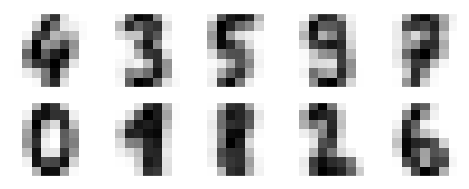

In [38]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [13]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [15]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951